<a href="https://colab.research.google.com/github/Avhijit-codeboy/Flipr_Hackathon_Project/blob/master/Hackathon1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Use seaborn for pairplot
!pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-vg0gqpsa
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-vg0gqpsa
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80383 sha256=a3eb13ab7b53ad489d172042fe4ebc36bacddb9319b8aea3025302bf07578c82
  Stored in directory: /tmp/pip-ephem-wheel-cache-c1_tdyhm/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
a=pd.read_excel('Train_dataset.xlsx',index_col=0)

In [0]:
b = a.drop(['Designation','Name','Insurance','salary','Region'],axis=1)
c = pd.DataFrame(data=b)
c = c.rename(columns={"Pulmonary score":"Pulmonary_score","cardiological pressure":"Cardiological_pressure"})


In [0]:
c1 = c.dropna()
c1

,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary_score,Cardiological_pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob
people_ID,,,,,,,,,,,,,,,,,,,,,,
1,Female,YES,1.0,Farmer,Public,2,0,Hypertension,68,8,<400,Normal,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010
3,Female,NO,1.0,Cleaner,Public,2,0,None,19,13,<300,Elevated,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000
4,Female,YES,1.0,Driver,Car,2,0,Coronary Heart Disease,33,9,<200,Stage-01,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225
5,Female,NO,2.0,Manufacturing,Car,2,0,Diabetes,23,7,<400,Normal,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800
6,Female,YES,1.0,Clerk,Public,2,0,None,35,9,<100,Stage-02,389.0,139.0,86.0,216.0,94.0,38.0,5,5,2.0,49.518345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22690,Male,YES,1.0,Farmer,Public,8,2,Diabetes,35,11,<200,Stage-01,397.0,78.0,150.0,337.0,69.0,44.0,31,3,2.0,53.741750
22691,Male,NO,2.0,Business,Car,8,2,Diabetes,20,14,<400,Normal,134.0,67.0,24.0,209.0,61.0,56.0,35,7,0.0,41.981760
22693,Male,YES,0.0,Clerk,Public,8,2,Diabetes,59,3,<100,Stage-02,177.0,111.0,151.0,296.0,87.0,37.0,16,5,2.0,47.708533


In [0]:
c1['Gender'] = c1['Gender'].map({1:'Female',0:'Male'})
c1['Married'] = c1['Married'].map({1:'YES',0:'NO'})
c1['Occupation'] = c1['Occupation'].map({1:'Driver',2:'Legal',3:'Sales',4:'Business',5:'Manufacturing',
                                        # 6:'Rsearcher',7:'Clerk',8:'Farmer',9:'Cleaner'})
c1['Pulmonary_score'] = c1['Pulmonary_score'].map({1:'<100',2:'<200',3:'<300',4:'<400'})
c1['Cardiological_pressure'] = c1['Cardiological_pressure'].map({1:'Normal',2:'Elevated',3:'Stage-01',4:'Stage-02'})
c1['comorbidity'] = c1['comorbidity'].map({1:'Hypertension',2:'Coronary Heart Disease',3:'None',4:'Diabetes'})
c1['Mode_transport'] = c1['Mode_transport'].map({1:'Public',2:'Walk',3:'Car'})
c1 = pd.get_dummies(c1, prefix='', prefix_sep='')
c1.tail()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob,NO,YES,Business,Cleaner,Clerk,Driver,Farmer,Legal,Manufacturing,Researcher,Sales,Car,Public,Walk,Coronary Heart Disease,Diabetes,Hypertension,None,<100,<200,<300,<400,Elevated,Normal,Stage-01,Stage-02
people_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22690,1.0,8,2,35,11,397.0,78.0,150.0,337.0,69.0,44.0,31,3,2.0,53.741750,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
22691,2.0,8,2,20,14,134.0,67.0,24.0,209.0,61.0,56.0,35,7,0.0,41.981760,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
22693,0.0,8,2,59,3,177.0,111.0,151.0,296.0,87.0,37.0,16,5,2.0,47.708533,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
22694,1.0,8,2,49,6,352.0,140.0,110.0,253.0,56.0,70.0,28,5,1.0,53.803565,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
22695,2.0,8,2,17,7,181.0,65.0,134.0,201.0,82.0,60.0,4,3,0.0,68.342400,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [0]:
c1

,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Infect_Prob,NO,YES,Business,Cleaner,Clerk,Driver,Farmer,Legal,Manufacturing,Researcher,Sales,Car,Public,Walk,Coronary Heart Disease,Diabetes,Hypertension,None,<100,<200,<300,<400,Elevated,Normal,Stage-01,Stage-02
people_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,2,0,68,8,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,49.135010,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
3,1.0,2,0,19,13,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,73.224000,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,1.0,2,0,33,9,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,48.779225,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5,2.0,2,0,23,7,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,87.868800,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
6,1.0,2,0,35,9,389.0,139.0,86.0,216.0,94.0,38.0,5,5,2.0,49.518345,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22690,1.0,8,2,35,11,397.0,78.0,150.0,337.0,69.0,44.0,31,3,2.0,53.741750,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
22691,2.0,8,2,20,14,134.0,67.0,24.0,209.0,61.0,56.0,35,7,0.0,41.981760,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
22693,0.0,8,2,59,3,177.0,111.0,151.0,296.0,87.0,37.0,16,5,2.0,47.708533,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1


In [0]:
train_dataset = c1.sample(frac=0.8,random_state=0)
test_dataset = c1.drop(train_dataset.index)

In [0]:
train_dataset.shape

(5642, 41)

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("Infect_Prob")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Children,5642.0,0.962247,0.717616,0.0,0.0,1.0,1.00,2.0
cases/1M,5642.0,3.308401,2.740291,1.0,2.0,2.0,4.00,8.0
Deaths/1M,5642.0,0.524637,0.861132,0.0,0.0,0.0,1.00,2.0
Age,5642.0,42.203119,15.744713,16.0,28.0,45.0,55.00,68.0
Coma score,5642.0,9.034562,3.716754,3.0,6.0,9.0,12.00,15.0
Diuresis,5642.0,278.604396,98.074482,110.0,194.0,277.0,364.00,450.0
Platelets,5642.0,87.593584,41.731448,15.0,52.0,88.0,124.00,160.0
HBB,5642.0,115.533499,55.599200,20.0,67.0,116.0,165.00,210.0
d-dimer,5642.0,275.106523,43.863362,200.0,236.0,275.0,313.00,350.0
Heart rate,5642.0,74.703828,14.910393,50.0,61.0,75.0,88.00,100.0


In [0]:
train_labels = train_dataset.pop('Infect_Prob')
test_labels = test_dataset.pop('Infect_Prob')
train_labels

people_ID
13812    48.974260
14052    50.739416
15697    48.030128
8834     47.026356
22103    48.156949
           ...    
9896     86.892480
13578    44.910720
22368    46.327707
21586    53.023983
21604    54.039552
Name: Infect_Prob, Length: 5642, dtype: float64

In [0]:
def normalize(x):
  return ((x - train_stats['mean']) / train_stats['std'])
normed_train_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)
normed_train_data

,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,NO,YES,Business,Cleaner,Clerk,Driver,Farmer,Legal,Manufacturing,Researcher,Sales,Car,Public,Walk,Coronary Heart Disease,Diabetes,Hypertension,None,<100,<200,<300,<400,Elevated,Normal,Stage-01,Stage-02
people_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13812,0.052608,-0.477468,-0.609241,1.638447,1.605013,1.604858,0.465031,-1.214649,1.091879,0.086931,-0.081042,1.428910,-0.021840,1.227689,-0.533166,0.533166,-0.343001,-0.351651,-0.336511,-0.352923,2.726200,-0.369539,-0.352605,-0.362691,-0.345255,-0.695888,-0.705165,1.388354,-0.583166,1.751350,-0.574161,-0.580983,-0.568704,-0.576617,-0.577436,1.704901,-0.577436,1.704901,-0.576617,-0.568704
14052,1.446112,-0.477468,-0.609241,-0.965602,-0.816455,0.626010,1.112025,0.781783,-0.230409,1.629479,0.784756,-0.941169,-1.454669,-0.000435,-0.533166,0.533166,-0.343001,2.843222,-0.336511,-0.352923,-0.366746,-0.369539,-0.352605,-0.362691,-0.345255,1.436758,-0.705165,-0.720150,-0.583166,-0.570887,-0.574161,1.720917,-0.568704,-0.576617,-0.577436,1.704901,-0.577436,1.704901,-0.576617,-0.568704
15697,-1.340895,-0.842393,-0.609241,0.876287,-0.816455,-1.668165,1.399578,1.429274,-1.073938,1.092940,1.554353,1.682847,-0.738255,1.227689,-0.533166,0.533166,2.914929,-0.351651,-0.336511,-0.352923,-0.366746,-0.369539,-0.352605,-0.362691,-0.345255,-0.695888,-0.705165,1.388354,1.714475,-0.570887,-0.574161,-0.580983,-0.568704,-0.576617,-0.577436,1.704901,-0.577436,1.704901,-0.576617,-0.568704
8834,-1.340895,1.712080,1.713283,0.431693,0.528805,0.789151,-1.499914,0.781783,-1.393111,1.428277,-0.177241,-1.279752,-0.738255,-0.000435,-0.533166,0.533166,-0.343001,-0.351651,2.971145,-0.352923,-0.366746,-0.369539,-0.352605,-0.362691,-0.345255,-0.695888,-0.705165,1.388354,-0.583166,-0.570887,1.741362,-0.580983,1.758074,-0.576617,-0.577436,-0.586440,-0.577436,-0.586440,-0.576617,1.758074
22103,-1.340895,1.712080,1.713283,1.511420,0.528805,1.349950,0.512956,0.080334,0.681514,1.294142,-0.562040,1.344264,-1.454669,-1.228560,-0.533166,0.533166,-0.343001,-0.351651,-0.336511,-0.352923,-0.366746,2.705594,-0.352605,-0.362691,-0.345255,-0.695888,1.417856,-0.720150,1.714475,-0.570887,-0.574161,-0.580983,1.758074,-0.576617,-0.577436,-0.586440,-0.577436,-0.586440,-0.576617,1.758074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,0.052608,1.712080,1.713283,-1.283168,1.066909,1.666036,1.207876,0.673868,1.205869,1.294142,0.399957,-1.110461,1.410988,-1.228560,1.875257,-1.875257,-0.343001,-0.351651,-0.336511,2.832980,-0.366746,-0.369539,-0.352605,-0.362691,-0.345255,-0.695888,1.417856,-0.720150,-0.583166,-0.570887,1.741362,-0.580983,-0.568704,-0.576617,1.731488,-0.586440,1.731488,-0.586440,-0.576617,-0.568704
13578,1.446112,-0.477468,-0.609241,-1.219655,-0.009299,1.696625,-1.667653,0.907684,-1.438707,0.757604,-0.465841,1.259618,-0.021840,-0.000435,1.875257,-1.875257,-0.343001,-0.351651,-0.336511,-0.352923,-0.366746,2.705594,-0.352605,-0.362691,-0.345255,-0.695888,1.417856,-0.720150,-0.583166,-0.570887,1.741362,-0.580983,-0.568704,-0.576617,1.731488,-0.586440,1.731488,-0.586440,-0.576617,-0.568704
22368,-1.340895,1.712080,1.713283,-0.838575,-1.354559,-0.658728,1.375615,-1.322564,0.293946,-0.181339,0.977155,0.921036,-0.738255,-0.000435,-0.533166,0.533166,-0.343001,-0.351651,-0.336511,-0.352923,-0.366746,-0.369539,-0.352605,-0.362691,2.895894,1.436758,-0.705165,-0.720150,1.714475,-0.570887,-0.574161,-0.580983,-0.568704,-0.576617,-0.577436,1.704901,-0.577436,1.704901,-0.576617,-0.568704


In [0]:
def corona_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = corona_model()

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2624      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,849
Trainable params: 6,849
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.65285176],
       [0.53571224],
       [1.578224  ],
       [0.5380783 ],
       [1.0474533 ],
       [1.1721804 ],
       [1.5851715 ],
       [1.205185  ],
       [1.2480924 ],
       [0.8360918 ]], dtype=float32)

In [0]:
model = corona_model()
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1275.0456,  mae:30.9028,  mse:1275.0453,  val_loss:107.3733,  val_mae:7.0004,  val_mse:107.3733,  
.....................

In [0]:
hist = pd.DataFrame(early_history.history)
hist['epoch'] = early_history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
16,74.502360,4.917742,74.502327,79.571090,5.060758,79.571091,16
17,73.998787,4.871956,73.998795,79.857768,5.112883,79.857758,17
18,73.049477,4.861139,73.049469,83.910160,5.225284,83.910156,18
19,72.647146,4.838038,72.647148,79.742809,5.040578,79.742813,19
20,71.556452,4.810248,71.556435,81.786307,5.180290,81.786316,20


In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)


Text(0, 0.5, 'MAE [Infect_Prob]')

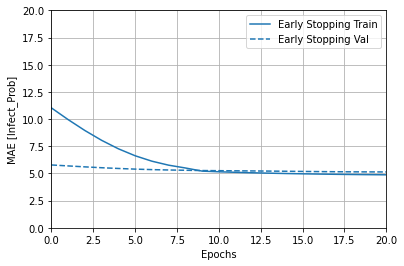

In [0]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 20])
plt.ylabel('MAE [Infect_Prob]')

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Infect_Prob".format(mae))

1410/1410 - 0s - loss: 92.3669 - mae: 5.5575 - mse: 92.3669
Testing set Mean Abs Error:  5.56 Infect_Prob


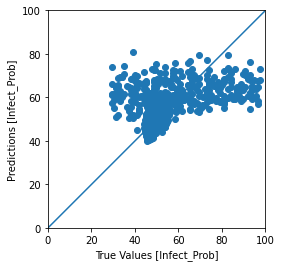

In [0]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Infect_Prob]')
plt.ylabel('Predictions [Infect_Prob]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


In [0]:
testing = pd.read_excel('Test_dataset.xlsx',index_col=0)

In [0]:
testing = testing.drop(['Designation','Name','Insurance','salary','Region'],axis=1)
testing = testing.rename(columns={"Pulmonary score":"Pulmonary_score","cardiological pressure":"Cardiological_pressure"})

In [0]:
testing = testing.dropna()

In [0]:
testing['Gender'] = testing['Gender'].map({1:'Female',0:'Male'})
#testing['Married'] = testing['Married'].map({1:'YES',0:'NO'})
#testing['Occupation'] = testing['Occupation'].map({1:'Driver',2:'Legal',3:'Sales',4:'Business',5:'Manufacturing',
 #                                       6:'Rsearcher',7:'Clerk',8:'Farmer',9:'Cleaner'})
#testing['Pulmonary_score'] = testing['Pulmonary_score'].map({1:'<100',2:'<200',3:'<300',4:'<400'})
#testing['Cardiological_pressure'] = testing['Cardiological_pressure'].map({1:'Normal',2:'Elevated',3:'Stage-01',4:'Stage-02'})
#testing['comorbidity'] = testing['comorbidity'].map({1:'Hypertension',2:'Coronary Heart Disease',3:'None',4:'Diabetes'})
#testing['Mode_transport'] = testing['Mode_transport'].map({1:'Public',2:'Walk',3:'Car'})
testing = pd.get_dummies(testing, prefix='', prefix_sep='')
testing.tail()

,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,NO,YES,Business,Cleaner,Clerk,Driver,Farmer,Legal,Manufacturing,Researcher,Sales,Car,Public,Walk,Coronary Heart Disease,Diabetes,Hypertension,None,<100,<200,<300,<400,Elevated,Normal,Stage-01,Stage-02
people_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23737,0,11,2,55,5,417,16,36,346,66,45,34,3,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0
11171,0,11,2,44,4,199,22,29,278,94,37,23,6,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
23243,0,11,2,46,6,161,15,28,294,73,56,6,6,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
11199,0,11,2,34,5,174,31,24,227,83,60,32,7,2,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
10787,0,11,2,27,4,126,16,63,282,80,59,15,4,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [0]:
test_stats = testing.describe()
test_stats = test_stats.transpose()
test_stats

,count,mean,std,min,25%,50%,75%,max
Children,14498.0,0.978963,0.811833,0.0,0.0,1.0,2.0,2.0
cases/1M,14498.0,5.886743,4.651725,0.0,3.0,4.0,11.0,13.0
Deaths/1M,14498.0,1.342737,0.953566,0.0,1.0,1.0,2.0,3.0
Age,14498.0,42.083667,15.326426,16.0,29.0,42.0,55.0,68.0
Coma score,14498.0,8.985860,3.754762,3.0,6.0,9.0,12.0,15.0
Diuresis,14498.0,280.657608,98.240677,110.0,195.0,280.0,366.0,450.0
Platelets,14498.0,86.886467,42.194450,15.0,51.0,87.0,124.0,160.0
HBB,14498.0,114.082977,55.207974,20.0,66.0,113.0,162.0,210.0
d-dimer,14498.0,274.667264,43.706160,200.0,237.0,274.0,312.0,350.0
Heart rate,14498.0,75.021727,14.549680,50.0,63.0,75.0,88.0,100.0


In [0]:
def normalize(x):
  return ((x - test_stats['mean']) / test_stats['std'])
normed_test_data = normalize(testing)
normed_test_data

,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,NO,YES,Business,Cleaner,Clerk,Driver,Farmer,Legal,Manufacturing,Researcher,Sales,Car,Public,Walk,Coronary Heart Disease,Diabetes,Hypertension,None,<100,<200,<300,<400,Elevated,Normal,Stage-01,Stage-02
people_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5942,1.257694,-0.405601,-0.359427,0.647009,-1.594205,1.092647,1.566877,1.483790,-0.793189,0.685807,0.056287,-0.252144,-1.409108,-0.003622,-0.511961,0.511961,-0.353555,-0.350461,-0.354665,2.818389,-0.351081,-0.347601,-0.347601,-0.365057,-0.356879,-0.712283,1.424913,-0.707229,-0.579613,1.707648,-0.574729,-0.569419,-0.568888,1.711061,-0.574941,-0.581100,-0.574941,-0.581100,1.711061,-0.568888
18664,1.257694,-0.405601,-0.359427,0.712256,0.536423,1.306408,0.192289,0.433217,-0.770309,0.410887,0.829891,-1.513938,0.003019,-0.003622,-0.511961,0.511961,-0.353555,-0.350461,-0.354665,-0.354788,-0.351081,2.876661,-0.347601,-0.365057,-0.356879,-0.712283,-0.701749,1.413872,-0.579613,1.707648,-0.574729,-0.569419,-0.568888,1.711061,-0.574941,-0.581100,-0.574941,-0.581100,1.711061,-0.568888
5603,1.257694,-0.405601,-0.359427,-0.462186,0.003766,1.621959,-1.111200,0.940390,-0.884710,0.891997,-0.523915,0.336693,-1.409108,1.217452,-0.511961,0.511961,-0.353555,-0.350461,-0.354665,-0.354788,-0.351081,-0.347601,-0.347601,-0.365057,2.801874,1.403840,-0.701749,-0.707229,-0.579613,1.707648,-0.574729,-0.569419,1.757695,-0.584392,-0.574941,-0.581100,-0.574941,-0.581100,-0.584392,1.757695
5649,1.257694,-0.405601,-0.359427,-0.723174,0.802751,-0.759946,-0.210607,-0.563016,-1.456711,0.823267,-0.040413,-0.588622,0.709083,1.217452,-0.511961,0.511961,-0.353555,-0.350461,-0.354665,-0.354788,-0.351081,-0.347601,-0.347601,-0.365057,2.801874,1.403840,-0.701749,-0.707229,-0.579613,-0.585561,-0.574729,1.756056,-0.568888,-0.584392,1.739189,-0.581100,1.739189,-0.581100,-0.584392,-0.568888
5099,1.257694,-0.405601,-0.359427,0.581762,-0.795220,-0.525827,0.524086,1.683036,0.854176,1.304377,1.506793,1.598486,0.003019,-0.003622,-0.511961,0.511961,2.828220,-0.350461,-0.354665,-0.354788,-0.351081,-0.347601,-0.347601,-0.365057,-0.356879,1.403840,-0.701749,-0.707229,-0.579613,1.707648,-0.574729,-0.569419,-0.568888,1.711061,-0.574941,-0.581100,-0.574941,-0.581100,1.711061,-0.568888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23737,-1.205867,1.099217,0.689269,0.842749,-1.061548,1.387841,-1.679995,-1.414342,1.632098,-0.620064,-0.717316,1.177889,-1.409108,1.217452,-0.511961,0.511961,-0.353555,2.853187,-0.354665,-0.354788,-0.351081,-0.347601,-0.347601,-0.365057,-0.356879,-0.712283,-0.701749,1.413872,1.725169,-0.585561,-0.574729,-0.569419,-0.568888,-0.584392,-0.574941,1.720755,-0.574941,1.720755,-0.584392,-0.568888
11171,-1.205867,1.099217,0.689269,0.125035,-1.327877,-0.831200,-1.537796,-1.541136,0.076253,1.304377,-1.490919,0.252573,0.709083,1.217452,-0.511961,0.511961,-0.353555,-0.350461,2.819368,-0.354788,-0.351081,-0.347601,-0.347601,-0.365057,-0.356879,1.403840,-0.701749,-0.707229,-0.579613,-0.585561,-0.574729,1.756056,-0.568888,-0.584392,1.739189,-0.581100,1.739189,-0.581100,-0.584392,-0.568888
23243,-1.205867,1.099217,0.689269,0.255528,-0.795220,-1.218005,-1.703695,-1.559249,0.442334,-0.138953,0.346389,-1.177459,0.709083,-0.003622,-0.511961,0.511961,2.828220,-0.350461,-0.354665,-0.354788,-0.351081,-0.347601,-0.347601,-0.365057,-0.356879,-0.712283,1.424913,-0.707229,-0.579613,-0.585561,-0.574729,1.756056,-0.568888,-0.584392,1.739189,-0.581100,1.739189,-0.581100,-0.584392,-0.568888


In [0]:
test_predictions1 = model.predict(normed_test_data).flatten()

In [0]:
test_predictions1

array([49.529804, 46.695557, 53.918728, ..., 44.298355, 48.261414,
       49.4672  ], dtype=float32)

In [0]:
outputData = {'Infect_Prob':test_predictions1}
output = pd.DataFrame(data=outputData)
output.to_excel("output1.xlsx",
             sheet_name='OutputFile')